# Projekt MSP1 / 2024
Cílem tohoto projektu je se seznámit s programovými nástroji využívaných ve statistice a osvojit si základní procedury. Projekt není primárně zaměřen na efektivitu využívání programového vybavení (i když úplně nevhodné konstrukce mohou mít vliv na hodnocení), ale nejvíce nás zajímají vaše statistické závěry a způsob vyhodnocení. Dbejte také na to, že každý graf musí splňovat nějaké podmínky - přehlednost, čitelnost, popisky.

V projektu budete analyzovat časy běhu šesti různých konfigurací algoritmů. Ke každé konfiguraci vzniklo celkem 200 nezávislých běhů, jejichž logy máte k dispozici v souboru [logfiles.zip](logfiles.zip).

Pokud nemáte rozchozené prostředí pro pro spouštění Jupyter notebooku, můžete využití službu [Google Colab](https://colab.google/). Jakákoliv spolupráce, sdílení řešení a podobně je zakázána!

S případnými dotazy se obracejte na Vojtěcha Mrázka (mrazek@fit.vutbr.cz).

__Odevzdání:__ tento soubor (není potřeba aby obsahoval výstupy skriptů) do neděle 27. 10. 2024 v IS VUT. Kontrola bude probíhat na Pythonu 3.12.3 (standardní instalace Ubuntu); neočekává se však to, že byste používali nějaké speciality a nekompatibilní knihovny. V případě nesouladu verzí a podobných problémů budete mít možnost reklamace a prokázání správnosti funkce. Bez vyplnění vašich komentářů a závěrů do označených buněk nebude projekt hodnocen!

__Upozornění:__ nepřidávejte do notebooku další buňky, odpovídejte tam, kam se ptáme (textové komentáře do Markdown buněk)

__Tip:__ před odevzdáním resetujte celý notebook a zkuste jej spustit od začátku. Zamezíte tak chybám krokování a editací, kdy výsledek z buňky na konci použijete na začátku.

__OTÁZKA K DOPLNĚNÍ:__

Michal Novák (xnovak3g)

## Načtení potřebných knihoven
Načtěte knihovny, které jsou nutné pro zpracování souborů a práci se statistickými funkcemi.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import json
from zipfile import ZipFile

## Načtení dat do DataFrame
Ze souboru `logfiles.zip` umístěném ve stejném adresáři načtěte data a vytvořte Pandas DataFrame.

Výsledky jsou uložené ve formátu JSON - pro zpracování použijte knihovnu `json`.
Můžete využít následující kostru - je vhodné pracovat přímo se ZIP souborem. Jedinou nevýhodou může být to, že vám bude vracet _byte_ objekt, který musíte přes funkci `decode` zpracovat.

Upravte také pomocí funkce `.astype()` datové typy patřičných sloupců.

```py
data = []
with ZipFile("logfiles.zip") as zf:
    for filename in zf.namelist():
        # TODO test názvu souboru
        with zf.open(filename, "r") as f:
            pass # vytvořte slovník

df = pd.DataFrame(data)
df
```

In [44]:
# inicializace prázdného pole
data = []

# čtení dat
with ZipFile("logfiles.zip") as zf:
    # procházení souborů
    for filename in zf.namelist():
        # ošetření na soubory typu JSON
        if filename.endswith('.json'):
            with zf.open(filename, "r") as f:
                # načtení, dekódovaní, zpracování
                data.append(json.loads(f.read().decode()))

# konverze na DataFrame
df = pd.DataFrame(data)

# přetypování
df = df.astype({'run': int, 'runtime': float})
df

,configuration,run,runtime,status
0,config6,149,53.733556,SUCCESS
1,config2,16,134.543496,SUCCESS
2,config6,180,117.108040,SUCCESS
3,config4,12,223.763044,SUCCESS
4,config5,193,159.540473,SUCCESS
...,...,...,...,...
1195,config5,95,199.461297,SUCCESS
1196,config5,99,155.491930,SUCCESS
1197,config2,83,125.243690,SUCCESS
1198,config5,153,223.312938,SUCCESS


## Analýza a čištění dat
Vhodným způsobem pro všechny konfigurace analyzujte časy běhů a pokud tam jsou, identifikujte hodnoty, které jsou chybné. Vyberte vhodný graf, který zobrazí samostatně jednotlivé konfigurace.

,configuration,run,runtime,status,runtime_lower,runtime_upper
6,config5,103,1800.000000,TIME LIMIT,107.453010,258.007372
42,config3,41,0.000000,SEGFAULT,82.428979,192.996557
51,config1,62,0.000000,SEGFAULT,74.279283,123.446070
92,config2,142,0.000000,SEGFAULT,97.201748,205.685752
99,config1,134,1800.000000,TIME LIMIT,74.279283,123.446070
104,config2,40,1800.000000,TIME LIMIT,97.201748,205.685752
230,config5,118,0.000000,SEGFAULT,107.453010,258.007372
301,config3,78,201.577616,SUCCESS,82.428979,192.996557
318,config3,184,0.000000,SEGFAULT,82.428979,192.996557
327,config4,110,1800.000000,TIME LIMIT,-14.911100,272.984806


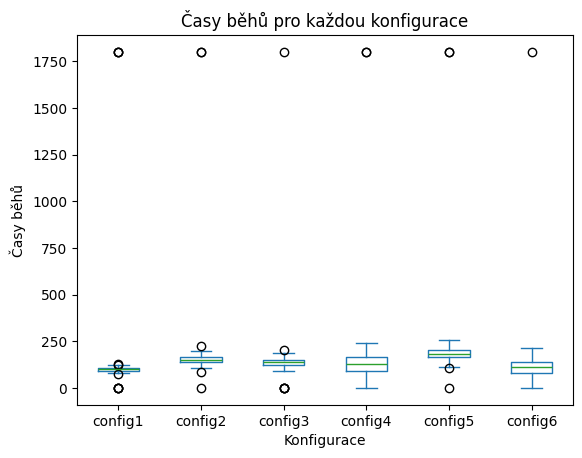

In [45]:
# použití kvartilů pro filtraci dat pomocí nalezení odlehlých hodnot

# výpočet pro každou konfiguraci
runtimes = df[['configuration','runtime']].groupby('configuration')
q1 = runtimes.quantile(0.25)
q3 = runtimes.quantile(0.75)
irq = q3 - q1

# výpočet hranic
lower_bound = q1 - 1.5 * irq
upper_bound = q3 + 1.5 * irq

# přidání hranic do původního rámce
df = df.join(lower_bound, on='configuration', rsuffix='_lower')
df = df.join(upper_bound, on='configuration', rsuffix='_upper')

# výpis odlehlých hodnot
display(df[(df['runtime'] < df['runtime_lower']) | (df['runtime'] > df['runtime_upper'])])

# diagram
df[["runtime","configuration"]].plot.box("configuration", xlabel='Konfigurace', ylabel="Časy běhů")
plt.title("Časy běhů pro každou konfigurace")
plt.show()

__OTÁZKA K DOPLNĚNÍ:__

_Objevily se nějaké chybné hodnoty? Proč tam jsou s ohledem na to, že se jedná o běhy algoritmů? Proč jste zvolili tento typ grafu?_

Chybné hodnoty se objevily. Většinou se jedná o běhy, které skončily statusem "SEGFAULT" nebo "TIME LIMIT", ale vyskytly se i některé se statusem "SUCCESS".
- TIME LIMIT - zde se mohlo například jednat o zacyklení algoritmu v "nekonečné smyčce", nebo čekání na událost, která nenastala
- SEGFAULT - chybný přístup do paměti (mimo hranice vyhrazené paměti), pravděpodobně neošetřený vstup
- SUCCESS - pravděpodobně chyba v algoritmu, která se projevuje specifickým vstupem - zkracuje nebo prolužuje dobu běhu. Dále se může jednat o chyby způsobené zatížením systému

Zvolený graf je tzv. boxplot (krabicový graf). V boxplotu můžeme vizualizovat data pomocí kvartilů. Zároveň tak můžeme pozorovat i chybné hodnoty (odlehlé prvky), které leží pod prvním kvartilem (vespod), nebo nad třetím kvartilem (nahoře).  


Vyčistěte dataframe `df` tak, aby tam tyto hodnoty nebyly a ukažte znovu analýzu toho, že čištění dat bylo úspěšné. Odtud dále pracujte s vyčištěným datasetem.

In [46]:
# filtrace rámce (odstranění odlehlých hodnot)
df = df[(df['runtime'] >= df['runtime_lower']) & (df['runtime'] <= df['runtime_upper'])]

# odstranění nepotřebných sloupců
df = df.drop(['runtime_lower', 'runtime_upper'], axis=1)

## Deskriptivní popis hodnot
Vypište pro jednotlivé konfigurace základní deskriptivní parametry.  

__TIP__ pokud výsledky uložíte jako Pandas DataFrame, zobrazí se v tabulce.

In [47]:
# popis hodnot
df.groupby('configuration')['runtime'].describe()

,count,mean,std,min,25%,50%,75%,max
configuration,,,,,,,,
config1,190.0,99.449016,8.866788,80.124311,93.034540,99.799944,104.737728,121.904556
config2,195.0,151.688034,18.583050,107.522086,138.003905,151.516091,163.764042,196.293171
config3,194.0,138.292420,19.393682,90.567110,124.769359,138.448002,151.501348,185.413857
config4,198.0,126.317205,51.635948,0.000000,92.673117,129.887760,164.013094,241.987620
config5,196.0,184.049441,28.276656,114.035821,164.072975,183.916111,201.255548,255.807973
config6,199.0,110.422689,40.875754,2.124534,81.656211,111.043642,137.554141,215.295283


__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte, co všechno můžeme z parametrů vyčíst._

Z tabulky lze pořadě vyčíst: 
- count: počet nechybných běhů pro každou konfiguraci
- mean: průměrnou hodnotu běhů pro danou konfiguraci
- std: směrodatnou odchylku běhů pro danou konfiguraci
- min, max: minimální a maximální hodnota běhů pro danou konfiguraci
- 25%: první kvartil
- 50%: medián (druhý kvartil)
- 75%: třetí kvartil

## Vizualizace
Vizualizujte časy běhů algoritmů tak, aby byl v jednom grafu zřejmý i rozptyl hodnot, avšak bylo možné porovnání. Zvolte vhodný graf, který pak níže komentujte.

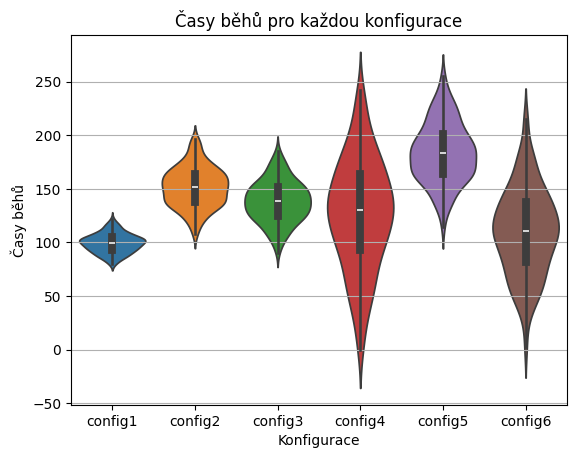

In [48]:
fig,axes = plt.subplots()
# houslové diagramy
sns.violinplot(data=df.groupby('configuration')['runtime'].apply(list).to_dict(), ax=axes)

axes.set_title('Časy běhů pro každou konfigurace')
axes.yaxis.grid(True)
axes.set_xlabel('Konfigurace')
axes.set_ylabel('Časy běhů')
plt.show()

__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte  výsledky z tabulky._

Zvolený graf je tzv. violin plot (houslový diagram), který kombinuje krabicový diagram se zobrazením hustoty hodnot. Jde rozeznat konzistence běhů a odhadnout rozložení dat. 

Z grafu lze například rozeznat, že konfigurace 1 bude mít pravděpodobně nejnižší rozptyl ze všech konfigurací a k tomu i nejnižší medián.

## Určení efektivity konfigurací algoritmů
Nás ale zajímá, jaká konfigurace je nejrychlejší. Z výše vykresleného grafu můžeme vyloučit některé konfigurace. Existuje tam však minimálně jedna dvojice, u které nedokážeme jednoznačně určit, která je lepší - pokud nebudeme porovnávat pouze extrémní hodnoty, které mohou být dané náhodou, ale celkově. Proto proveďte vhodný test významnosti - v následující části diskutujte zejména rozložení dat (i s odkazem na předchozí buňky, variabilitu vs polohu a podobně). Je nutné každý logický krok a výběry statistických funkcí komentovat. 

Vužijte vhodnou funkci z knihovny `scipy.stats` a funkci poté __implementujte sami__ na základě základních matematických funkcí knihovny `numpy` případně i funkcí pro výpočet vybraného rozložení v [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html). Při vlastní implementaci není nutné se primárně soustředit na efektivitu výpočtu (není potřeba využít všechny funkce numpy, můžete použít normální cykly a podobně - v hodnocení však bude zahrnuta přehlednost a neměly by se objevit jasné chyby, jako je zvýšení třídy složitosti a podobně).

__OTÁZKA K DOPLNĚNÍ:__

_Jaká data budete zkoumat? Jaké mají rozložení a parametry (např. varianci) a jaký test použijete? Jaká je nulová hypotéza? Jak se liší variabilita a poloha vybraných konfigurací?_

Zkoumat se budou běhy jednotlivých konfigurací algoritmů. Jejich rozložení je nejprve nutno zjistit. Podle prvotního odhadu by se mohlo jednat o normální rozdělení, což lze vyzkoumat pomocí p-hodnot Shapiro–Wilk testu a dále ověřit vizuálně pomocí histogramu. Pro porovnání 2 konfigurací s normálním rozložením je vhodný dvouvýběrový Studentův t-test. Prvně ale musíme určit, zda jsou dat závislá, či nezávislá. V zadání je napsáno "budete analyzovat časy běhu šesti různých konfigurací algoritmů", z čehož je vyvodit, že data jsou nezívislá, jelikož se neprovádělo měření nad jedním algoritmem, ale nad více algoritmy. Data tedy musí být analyzována nepárovým t-testem.


Hypotézy pro Studentův t-test budou stanoveny následovně:
- $H_0$: Obě porovnávané konfigurace mají stejný průměr
- $H_1$: Obě porovnávané konfigurace mají různý průměr

config1: Shapiro-Wilk p-hodnota = 0.36605847080986026, Variance = 78.61992795586703
config2: Shapiro-Wilk p-hodnota = 0.42148105777568556, Variance = 345.32973818729755
config3: Shapiro-Wilk p-hodnota = 0.8374173595659102, Variance = 376.1149002162146
config4: Shapiro-Wilk p-hodnota = 0.4063795373525325, Variance = 2666.2711756427784
config5: Shapiro-Wilk p-hodnota = 0.3730437861605712, Variance = 799.5692465554648
config6: Shapiro-Wilk p-hodnota = 0.7656591016111406, Variance = 1670.8272838985208


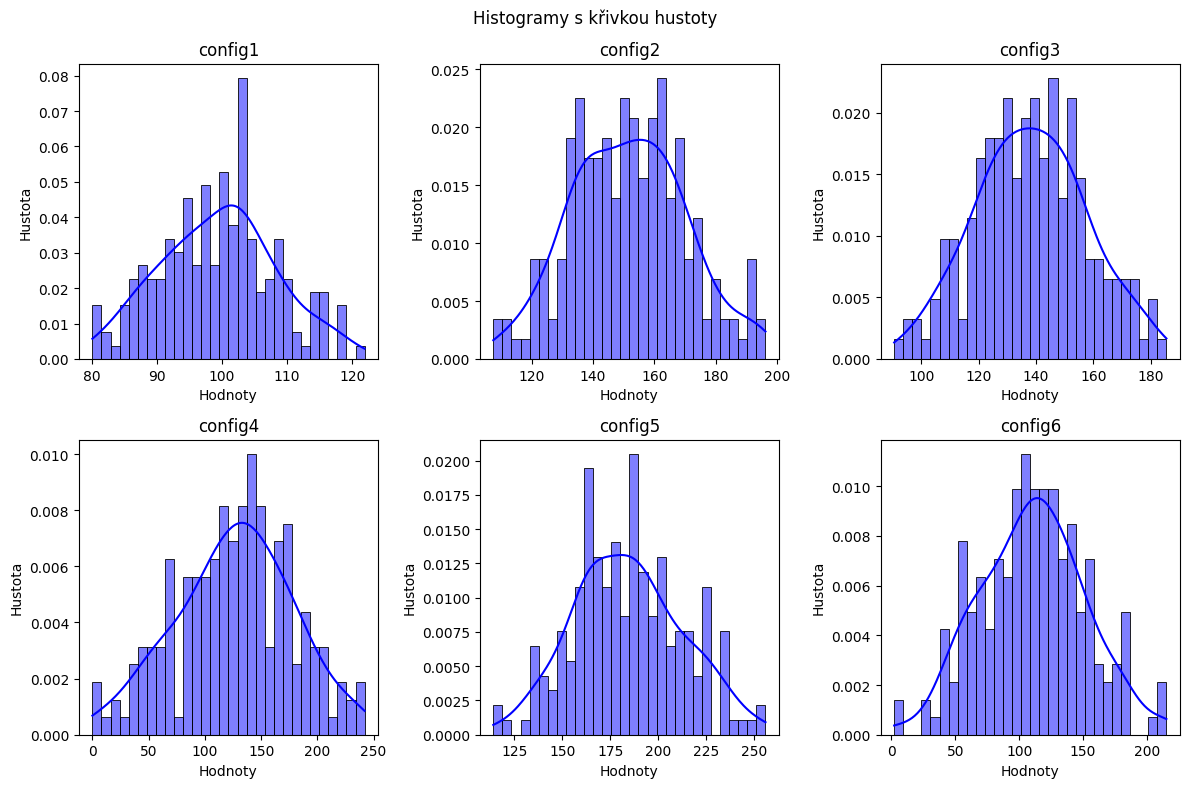

,Configuration,Order
0,config1,1. fastest
1,config6,2. fastest
2,config4,3. fastest
3,config3,4. fastest
4,config2,5. fastest
5,config5,6. fastest


In [49]:
# extrakce dat pro každou konfiguraci
data_dict = df.groupby('configuration')['runtime'].apply(np.array).to_dict()

# vytvoření subplotů
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8)) 
axes_lin = axes.reshape(-1)

data = np.random.randn(200)

# kontrola, jestli mají data normální distribuci
for index, (config, data) in enumerate(data_dict.items()):
    # Shapiro–Wilk test
    s_stat, s_p_value = stats.shapiro(data)
    print(f'{config}: Shapiro-Wilk p-hodnota = {s_p_value}, Variance = {data.var(ddof=1)}')
    
    # histogram
    sns.histplot(data, kde=True, stat="density", bins=30, color='blue', ax=axes_lin[index])
    axes_lin[index].set_xlabel('Hodnoty')
    axes_lin[index].set_ylabel('Hustota')
    axes_lin[index].set_title(config)

# vykreslení
fig.suptitle(f'Histogramy s křivkou hustoty')
fig.tight_layout()
plt.show()

# porovnání všech konfigurací
results = []
for index, (config1, data1) in enumerate(data_dict.items()):
    for config2, data2 in list(data_dict.items()):
        if config1 == config2:
            continue
        t_stat, _ = stats.ttest_ind(data1, data2, equal_var=False)
        results.append({'A': config1, 'B': config2, 't_stat': t_stat})

# porovnání výsledků t-testu
rdf = pd.DataFrame(results)

# výpočet pozitivních hodnot (počet pozitivních hodnot prozrazuje pořadí konfigurace)
find_order = lambda x: f"{len(list(filter(lambda y: y >= 0, x))) + 1}. fastest" 
tmp_data = rdf.groupby('A')['t_stat'].apply(find_order).sort_values()

# zobrazení výsledku
pd.DataFrame({'Configuration': tmp_data.keys(), 'Order': tmp_data.values})



__OTÁZKA K DOPLNĚNÍ:__

_Jaký je závěr statistického testu?_

Podle hodnot Shapiro-Wilk testu není možné zamítnout normální rozložení dat konfigurací, což je možné potvrdit i vizuálně pomocí histogramů. Je tedy možno provést nepárový t-test, který dokáže srovnat rychlosti jednotlivých konfigurací. Z výsledků vyplývá, že nejrychlejší konfigurce je konfigurace s označením 'config1' (pořadí je možno vidět výše).

Seřazení vyplývá z porovnání hodnot t-testu stats.ttest_ind(data1, data2, equal_var=False). Pokud je:
- t_stat > 0 => konfigurace s data1 je pomalejší než konfigurace s data2
- t_stat < 0 => konfigurace s data1 je rychlejší než konfigurace s data2 
- t_stat = 0 => konfigurace s data1 je stejně rychlá jako konfigurace s data2 


### Vlastní implementace
Implementujte stejný test pomocí knihovních funkcí a ukažte, že je výsledek stejný.

In [50]:
# vlastní implementace nepárového t-testu

def independent_t_test(x1: np.ndarray, x2: np.ndarray) -> float:
    
    # rozptyl (můžeme použít i <np_ndarray>.var(ddof=1), implementace vlastního rozptylu "na ukázku")
    def variance(x: np.ndarray, mean: float) -> None:
        # vnitřní hodnoty pro sumu
        tmp = [(xi - mean)**2 for xi in x]
        
        # suma
        tmp_sum = sum(tmp)
        
        # podíl
        return tmp_sum/(len(x)-1)
    
    # průměry
    x1_mean = x1.mean()
    x2_mean = x2.mean()
    
    # rozptyly
    var_1 = variance(x1, x1_mean) 
    var_2 = variance(x2, x2_mean)
    
    # použitím výpočtu rozptylu z numpy by se měla zvýšit rychlost výpočtu 
    # var_1 = x1.var(ddof=1)
    # var_2 = x2.var(ddof=1)
    
    # t-test
    d = (x1_mean-x2_mean)/(((var_1/len(x1))+(var_2/len(x2)))**0.5)
    return d


# test pro každou dvojici konfigurací
rdf['custom_t_stat'] = rdf.apply(lambda row: independent_t_test(data_dict[row['A']], data_dict[row['B']]), axis=1)

# porovnání výsledků se scipy.stats.ttest_ind
rdf['comaprison'] = rdf.apply(lambda row: 'Results are the same' if (abs(row['custom_t_stat'] - row['t_stat']) < 1e-9) else 'Different results', axis=1)
rdf

,A,B,t_stat,custom_t_stat,comaprison
0,config1,config2,-35.342562,-35.342562,Results are the same
1,config1,config3,-25.325037,-25.325037,Results are the same
2,config1,config4,-7.211850,-7.211850,Results are the same
3,config1,config5,-39.911083,-39.911083,Results are the same
4,config1,config6,-3.697144,-3.697144,Results are the same
5,config2,config1,35.342562,35.342562,Results are the same
6,config2,config3,6.954977,6.954977,Results are the same
7,config2,config4,6.499588,6.499588,Results are the same
8,config2,config5,-13.379387,-13.379387,Results are the same
9,config2,config6,12.941608,12.941608,Results are the same
